Import the files 


In [16]:
from fastai.tabular.all import *
airlines=pd.read_csv('/kaggle/input/finaldata/data1.csv')
airlines.head()


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


*Calculation of delay fraction , whether the data has more delay or less delay
if delay fraction is above 0.5 it indicates more delay in the data set
If delay fraction is ****less than 0.5 , it indicates less delay in the data set ********
0.21 - means have less delay 
***********

In [17]:

if 'id' in airlines.columns:
    del airlines['id']
print(airlines.head())
delay_fraction = round((airlines['Delay'] == 1).mean(), 3)
print(f"Delay fraction: {delay_fraction}")
print(airlines['Delay'].value_counts())


  Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0      CO     269         SFO       IAH          3    15     205      1
1      US    1558         PHX       CLT          3    15     222      1
2      AA    2400         LAX       DFW          3    20     165      1
3      AA    2466         SFO       DFW          3    20     195      1
4      AS     108         ANC       SEA          3    30     202      0
Delay fraction: 0.21
Delay
0    789
1    210
Name: count, dtype: int64


In [18]:
airlines.shape

(999, 8)

In [19]:
airlines.head()


,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0


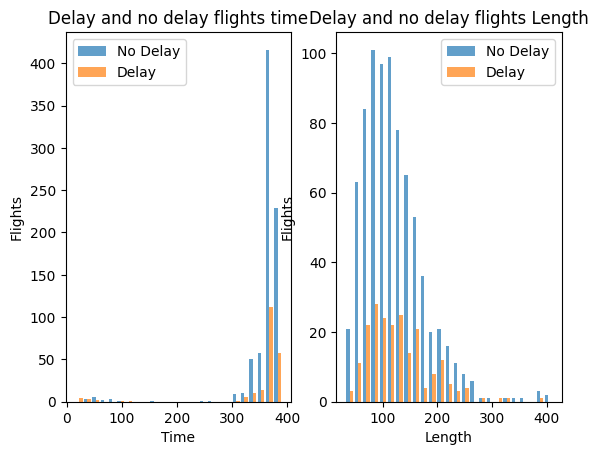

In [20]:
import matplotlib.pyplot as plt
fig,(a,b)=plt.subplots(1,2)
a.hist([airlines['Time'][airlines['Delay']==0],airlines['Time'][airlines['Delay']==1]],25,alpha=0.7,label=['No Delay','Delay'])
a.set(xlabel='Time',ylabel='Flights')
a.set_title('Delay and no delay flights time')
a.legend()

b.hist([airlines['Length'][airlines['Delay']==0],airlines['Length'][airlines['Delay']==1]],25,alpha=0.7,label=['No Delay','Delay'])
b.set(xlabel='Length',ylabel='Flights')
b.set_title('Delay and no delay flights Length')
b.legend()


In [21]:
categorical = [var for var in airlines.columns if airlines[var].dtype == 'object' or airlines[var].dtype.name == 'category']
categorical
airlines[categorical].isnull().sum()


Airline        0
AirportFrom    0
AirportTo      0
dtype: int64

In [22]:
airlines['Airline'].replace('?',np.NaN,inplace=True)
airlines['AirportFrom'].replace('?',np.NaN,inplace=True)
airlines['AirportTo'].replace('?',np.NaN,inplace=True)
airlines[categorical].isnull().sum()
for var in categorical:
    print(var,'contains',len(airlines[var].unique()),'labels')


Airline contains 18 labels
AirportFrom contains 220 labels
AirportTo contains 71 labels


In [23]:
from sklearn.linear_model import LogisticRegression
airlines.nunique()

Airline         18
Flight         927
AirportFrom    220
AirportTo       71
DayOfWeek        1
Time            71
Length         206
Delay            2
dtype: int64

In [24]:
numerical=[var for var in airlines.columns if airlines[var].dtype!='0']
print(numerical)
airlines[numerical].isnull().sum()


['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'Delay']


Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
#independent variables


In [26]:
from sklearn.model_selection import train_test_split

x = airlines.iloc[:, :-1] 
y = airlines.iloc[:, -1]  
x=pd.get_dummies(x)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=0)

x_train.head()


,Flight,DayOfWeek,Time,Length,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,AirportTo_SJC,AirportTo_SJU,AirportTo_SLC,AirportTo_SMF,AirportTo_SNA,AirportTo_STL,AirportTo_TUL,AirportTo_TUS,AirportTo_TYS,AirportTo_YUM
395,6345,3,360,125,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
912,1092,3,385,169,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
258,1617,3,360,118,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
906,110,3,385,163,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
580,4015,3,365,160,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)
a=1000
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression(max_iter=a)
model.fit(x_train, y_train)
predictions = model.predict(x_valid)
accuracy = accuracy_score(y_valid, predictions)
np.round(accuracy,3)


0.77

In [28]:
#built-in of gaussian navie bayes
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_valid)
acc = accuracy_score(y_valid, pred)
print(round(acc, 3))


0.5


In [29]:
#random-forest Tree
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_classifier=RandomForestClassifier(n_estimators=1000,random_state=0)
rf_classifier.fit(x_train,y_train)

rf_pred=rf_classifier.predict(x_valid)
rf_acc=accuracy_score(y_valid,rf_pred)
rf_acc

0.7433333333333333